# Decision Tree Algorithm on Heart attact dataset

<b> Load Datset

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#load dataset
data=pd.read_csv(r'C:\Users\santhosh\Downloads\archive (7)\heart_statlog_cleveland_hungary_final.csv')
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
data.describe(include='all')

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

<b>Data Clean

In [8]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [9]:
data.duplicated().sum()

272

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
pre_value=data['chest pain type'].value_counts()
pre_value

chest pain type
4    496
3    203
2    173
1     46
Name: count, dtype: int64

<B> Exploratory Data Analysis

<Axes: xlabel='chest pain type', ylabel='count'>

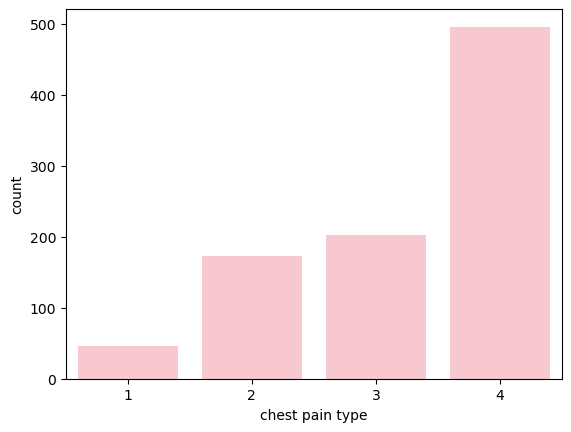

In [13]:
sns.countplot(data, x='chest pain type', color='pink')

<Axes: xlabel='chest pain type', ylabel='Count'>

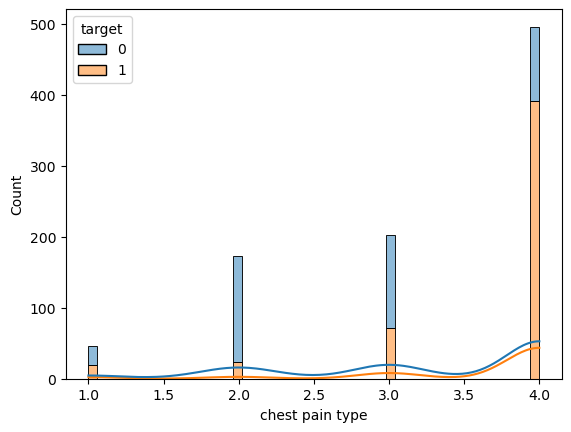

In [14]:
sns.histplot(data, x='chest pain type', hue='target', multiple='stack', bins=50, kde=True)

In [15]:
#split dataset in features and target variable

X = data.drop(['target'], axis=1)

y = data['target']

In [16]:
X.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1


In [17]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: target, dtype: int64

<b> Train-Test Split

In [18]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((642, 11), (276, 11))

In [20]:
# check data types in X_train

X_train.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
dtype: object

<b>Applying Algorithm

In [21]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

DTree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
DTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
y_pred = DTree.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.8333


In [24]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 96,  16],
       [ 30, 134]], dtype=int64)

<Axes: >

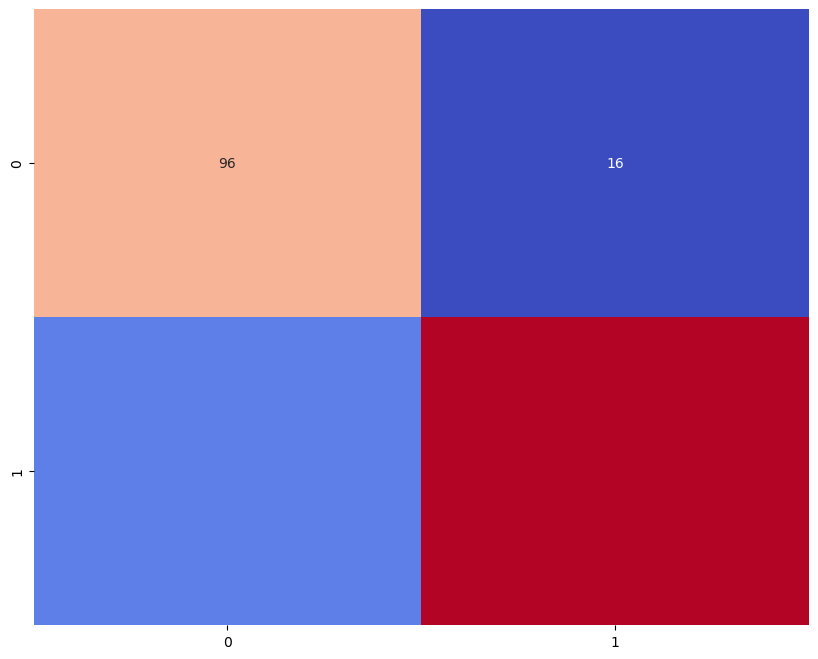

In [25]:
# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)

<b> Predicted Values

In [26]:
# Create a classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       112
           1       0.89      0.82      0.85       164

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276



<b> Tree Ploting

[Text(0.5, 0.875, 'x[10] <= 1.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]'),
 Text(0.25, 0.625, 'x[9] <= 1.25\ngini = 0.283\nsamples = 275\nvalue = [228, 47]'),
 Text(0.125, 0.375, 'x[2] <= 3.5\ngini = 0.203\nsamples = 244\nvalue = [216, 28]'),
 Text(0.0625, 0.125, 'gini = 0.08\nsamples = 167\nvalue = [160, 7]'),
 Text(0.1875, 0.125, 'gini = 0.397\nsamples = 77\nvalue = [56, 21]'),
 Text(0.375, 0.375, 'x[5] <= 0.5\ngini = 0.475\nsamples = 31\nvalue = [12, 19]'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.75, 0.625, 'x[2] <= 3.5\ngini = 0.309\nsamples = 367\nvalue = [70, 297]'),
 Text(0.625, 0.375, 'x[1] <= 0.5\ngini = 0.483\nsamples = 108\nvalue = [44, 64]'),
 Text(0.5625, 0.125, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.6875, 0.125, 'gini = 0.437\nsamples = 87\nvalue = [28, 59]'),
 Text(0.875, 0.375, 'x[7] <= 175.5\ngini = 0.181\nsamples = 259\nvalue = [26, 233]'),


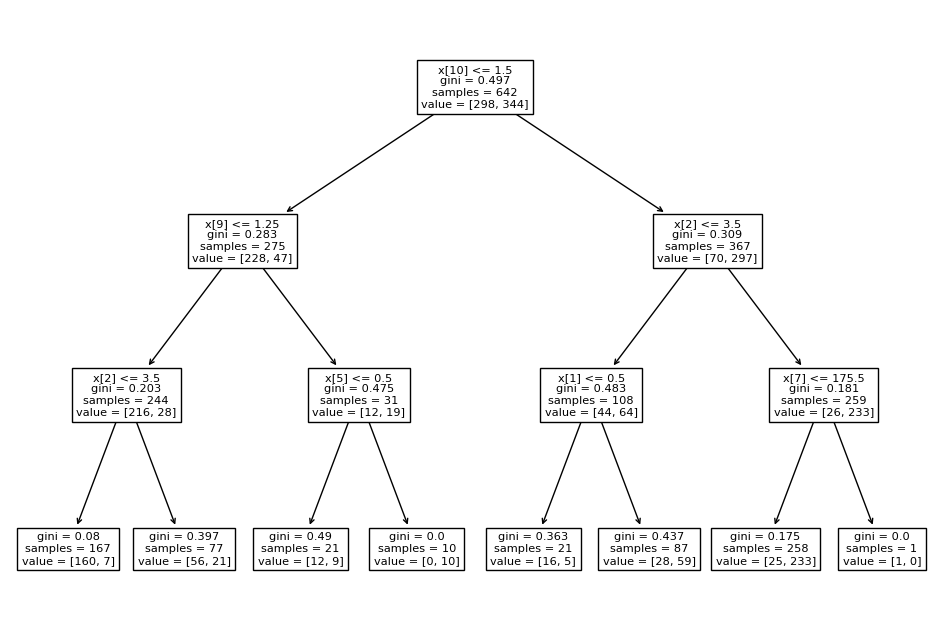

In [27]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(DTree.fit(X_train, y_train))